# Nordeus Data Science Challenge 2024

In [28]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    mean_absolute_error,
    mean_squared_error,
)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [29]:
previous_lives_train = pd.read_csv('previous_lives_training_data.csv', sep=',')
registration_train = pd.read_csv('registration_data_training.csv', sep=',')

previous_lives_test = pd.read_csv('previous_lives_test_data.csv', sep=',')
registration_test = pd.read_csv('registration_data_test.csv', sep=',')

In [30]:
previous_lives_train.head().T

,0,1,2,3,4
user_id,5,5,7,7,7
registration_date,2022-04-21,2023-05-07,2022-04-06,2023-02-06,2023-05-28
registration_season_day,26,15,11,9,8
registration_country,France,France,Turkey,Turkey,Turkey
registration_channel_detailed,Organic,Paid,Organic,Organic,Unknown
registration_store,AppStore,AppStore,AppStore,GooglePlay,GooglePlay
registration_platform_specific,iOS Phone,iOS Phone,iOS Phone,Android Phone,Android Phone
is_payer_lifetime,False,False,False,False,False
days_active_lifetime,1,18,21,2,1
transaction_count_iap_lifetime,0,0,0,0,0


In [31]:
registration_train.head().T

,0,1,2,3,4
user_id,5,7,13,23,25
registration_time_utc,2024-05-25 01:26:48.000,2024-06-14 20:09:31.000,2024-05-31 09:06:51.000,2024-05-31 04:00:33.000,2024-06-15 19:56:05.000
registration_platform_specific,iOS Phone,Android Phone,Android Phone,Android Phone,iOS Phone
registration_country,France,Turkey,Belarus,Indonesia,Egypt
registration_store,AppStore,GooglePlay,GooglePlay,GooglePlay,AppStore
registration_season_day,7,27,13,13,28
registration_channel_detailed,Organic,Unknown,Organic,Paid,Organic
registration_device_type,Phone,Phone,Phone,Phone,Phone
registration_device_manufacturer,Apple,Xiaomi,Xiaomi,OPPO,Apple
session_count,1,1,2,4,5


In [32]:
previous_lives_test.head().T    

,0,1,2,3,4
user_id,300004,300004,300006,300012,300012
registration_date,2022-04-20,2023-04-06,2022-06-09,2022-05-25,2023-06-13
registration_season_day,25,12,19,4,24
registration_country,Switzerland,Finland,Brazil,Switzerland,Switzerland
registration_channel_detailed,Organic,Paid,Organic,Paid,Paid
registration_store,GooglePlay,GooglePlay,AppStore,GooglePlay,GooglePlay
registration_platform_specific,Android Phone,Android Phone,iOS Phone,Android Phone,Android Phone
is_payer_lifetime,False,False,False,False,False
days_active_lifetime,5,1,69,4,96
transaction_count_iap_lifetime,0,0,0,0,0


In [33]:
registration_test.head().T

,0,1,2,3,4
user_id,300004,300006,300012,300022,300031
registration_time_utc,2024-07-04 10:16:58.000,2024-06-25 23:04:49.000,2024-06-17 17:12:37.000,2024-06-24 15:29:55.000,2024-06-30 16:09:40.000
registration_platform_specific,Android Phone,iOS Phone,Android Phone,Android Phone,Android Phone
registration_country,Hungary,Brazil,Switzerland,Indonesia,Indonesia
registration_store,GooglePlay,AppStore,GooglePlay,GooglePlay,GooglePlay
registration_season_day,19,10,2,9,15
registration_channel_detailed,Paid,Organic,Paid,Organic,Organic
registration_device_type,Phone,Phone,Phone,Phone,Phone
registration_device_manufacturer,Xiaomi,Apple,OPPO,samsung,samsung
session_count,8,1,1,1,1


Combine previous and updated user information.

In [34]:
previous_lives_train_prefixed = previous_lives_train.rename(columns=lambda x: f'{x}_previous' if x != 'user_id' else x)
previous_lives_test_prefixed = previous_lives_test.rename(columns=lambda x: f'{x}_previous' if x != 'user_id' else x)

comb_data_train = pd.merge(previous_lives_train_prefixed, registration_train, on='user_id', how='left')
comb_data_test = pd.merge(previous_lives_test_prefixed, registration_test, on='user_id', how='left')

comb_data_train.info(), comb_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84941 entries, 0 to 84940
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       84941 non-null  int64  
 1   registration_date_previous                    84941 non-null  object 
 2   registration_season_day_previous              84941 non-null  int64  
 3   registration_country_previous                 84941 non-null  object 
 4   registration_channel_detailed_previous        84941 non-null  object 
 5   registration_store_previous                   84941 non-null  object 
 6   registration_platform_specific_previous       84941 non-null  object 
 7   is_payer_lifetime_previous                    84941 non-null  bool   
 8   days_active_lifetime_previous                 84941 non-null  int64  
 9   transaction_count_iap_lifetime_previous       84941 non-null 

(None, None)

We can see that all columns match between training and test data, except test data lacks target variable, which is our goal of prediction.

In [35]:
comb_data_train.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))).T

,count,mean,std,min,25%,50%,75%,max
user_id,84941,105724,63599.4,5,51738,100428,161383,218956
registration_season_day_previous,84941,14.2458,8.08576,1,7,14,21,28
days_active_lifetime_previous,84941,25.0358,50.6545,1,2,6,24,650
transaction_count_iap_lifetime_previous,84941,0.624928,4.96977,0,0,0,0,313
registration_season_day,84941,13.5716,8.0454,1,7,13,20,28
session_count,84941,2.25246,2.08795,0,1,2,3,52
playtime,84941,1.90708e+06,2.40793e+06,0,359693,1.15276e+06,2.56608e+06,5.81736e+07
number_of_devices_used,84941,1.00383,0.117352,0,1,1,1,4
total_match_played_count,84941,1.02196,1.64557,0,0,1,1,29
total_match_won_count,84941,0.716745,1.24261,0,0,0,1,17


In [36]:
comb_data_train.replace('Unknown', np.nan, inplace=True)
comb_data_test.replace('Unknown', np.nan, inplace=True)

print(comb_data_train.isna().sum())
print(comb_data_test.isna().sum())

user_id                                            0
registration_date_previous                         0
registration_season_day_previous                   0
registration_country_previous                      7
registration_channel_detailed_previous          2966
registration_store_previous                        0
registration_platform_specific_previous            0
is_payer_lifetime_previous                         0
days_active_lifetime_previous                      0
transaction_count_iap_lifetime_previous            0
is_rewarded_video_watcher_lifetime_previous        0
registration_time_utc                              0
registration_platform_specific                     0
registration_country                               2
registration_store                                 0
registration_season_day                            0
registration_channel_detailed                   4674
registration_device_type                           0
registration_device_manufacturer              

Certain columns can be transformed to create meaningful features. For example, we can calculate the average session duration by dividing the total playtime by the number of game sessions on the first day, providing insights into user engagement per session. Additionally, we can compute the win rate by dividing the total number of matches won by the total number of matches played, which helps indicate player success.

In [37]:
comb_data_train['session_playtime_ratio'] = comb_data_train['playtime'] / (comb_data_train['session_count'] + 1e-5)
comb_data_test['session_playtime_ratio'] = comb_data_test['playtime'] / (comb_data_test['session_count'] + 1e-5)

comb_data_train['win_rate'] = comb_data_train['total_match_won_count'] / (comb_data_train['total_match_played_count'] + 1e-5)
comb_data_test['win_rate'] = comb_data_test['total_match_won_count'] / (comb_data_test['total_match_played_count'] + 1e-5)

comb_data_train.head().T

,0,1,2,3,4
user_id,5,5,7,7,7
registration_date_previous,2022-04-21,2023-05-07,2022-04-06,2023-02-06,2023-05-28
registration_season_day_previous,26,15,11,9,8
registration_country_previous,France,France,Turkey,Turkey,Turkey
registration_channel_detailed_previous,Organic,Paid,Organic,Organic,NaN
registration_store_previous,AppStore,AppStore,AppStore,GooglePlay,GooglePlay
registration_platform_specific_previous,iOS Phone,iOS Phone,iOS Phone,Android Phone,Android Phone
is_payer_lifetime_previous,False,False,False,False,False
days_active_lifetime_previous,1,18,21,2,1
transaction_count_iap_lifetime_previous,0,0,0,0,0


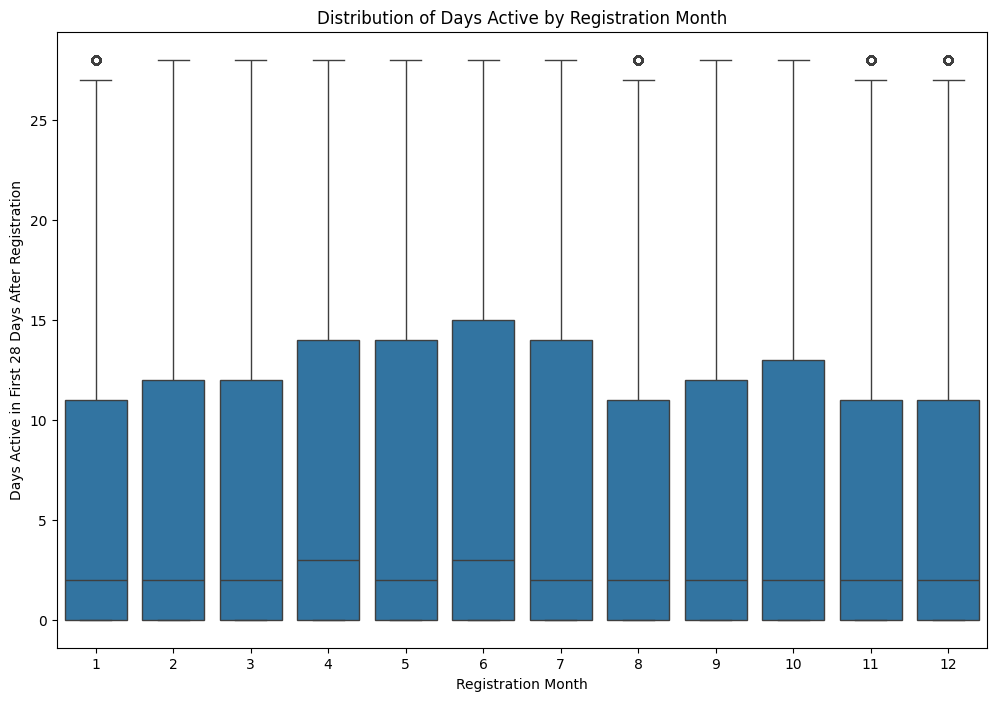

In [38]:
comb_data_train['registration_month'] = pd.to_datetime(comb_data_train['registration_date_previous']).dt.month.astype('int64')
comb_data_test['registration_month'] = pd.to_datetime(comb_data_test['registration_date_previous']).dt.month.astype('int64')

plt.figure(figsize=(12, 8))
sns.boxplot(data=comb_data_train, x='registration_month', y='days_active_first_28_days_after_registration')
plt.title("Distribution of Days Active by Registration Month")
plt.xlabel("Registration Month")
plt.ylabel("Days Active in First 28 Days After Registration")
plt.show()

* Extracting the month from registration_date_previous to capture seasonal effects (e.g., higher engagement during holidays)

In [39]:
country_continents_mapping = pd.read_csv('continents2.csv', sep=',')
country_continents_mapping = country_continents_mapping.rename(columns={"name" : "country"})

comb_data_train = comb_data_train.rename(columns={"registration_country": "country"})
comb_data_test = comb_data_test.rename(columns={"registration_country": "country"})

comb_data_train = pd.merge(comb_data_train , country_continents_mapping[['country', 'sub-region']], on='country', how='left')
comb_data_test = pd.merge(comb_data_test, country_continents_mapping[['country', 'sub-region']], on='country', how='left')

* Since there are 182 unique values in the "country" field, I decided to group countries by sub-regions (e.g., Southern Europe, Northern Africa) to simplify the encoding process and avoid cursed-dimensionality problem.

In [40]:
numerical_cols = comb_data_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = comb_data_train.select_dtypes(include=['object']).columns.tolist()

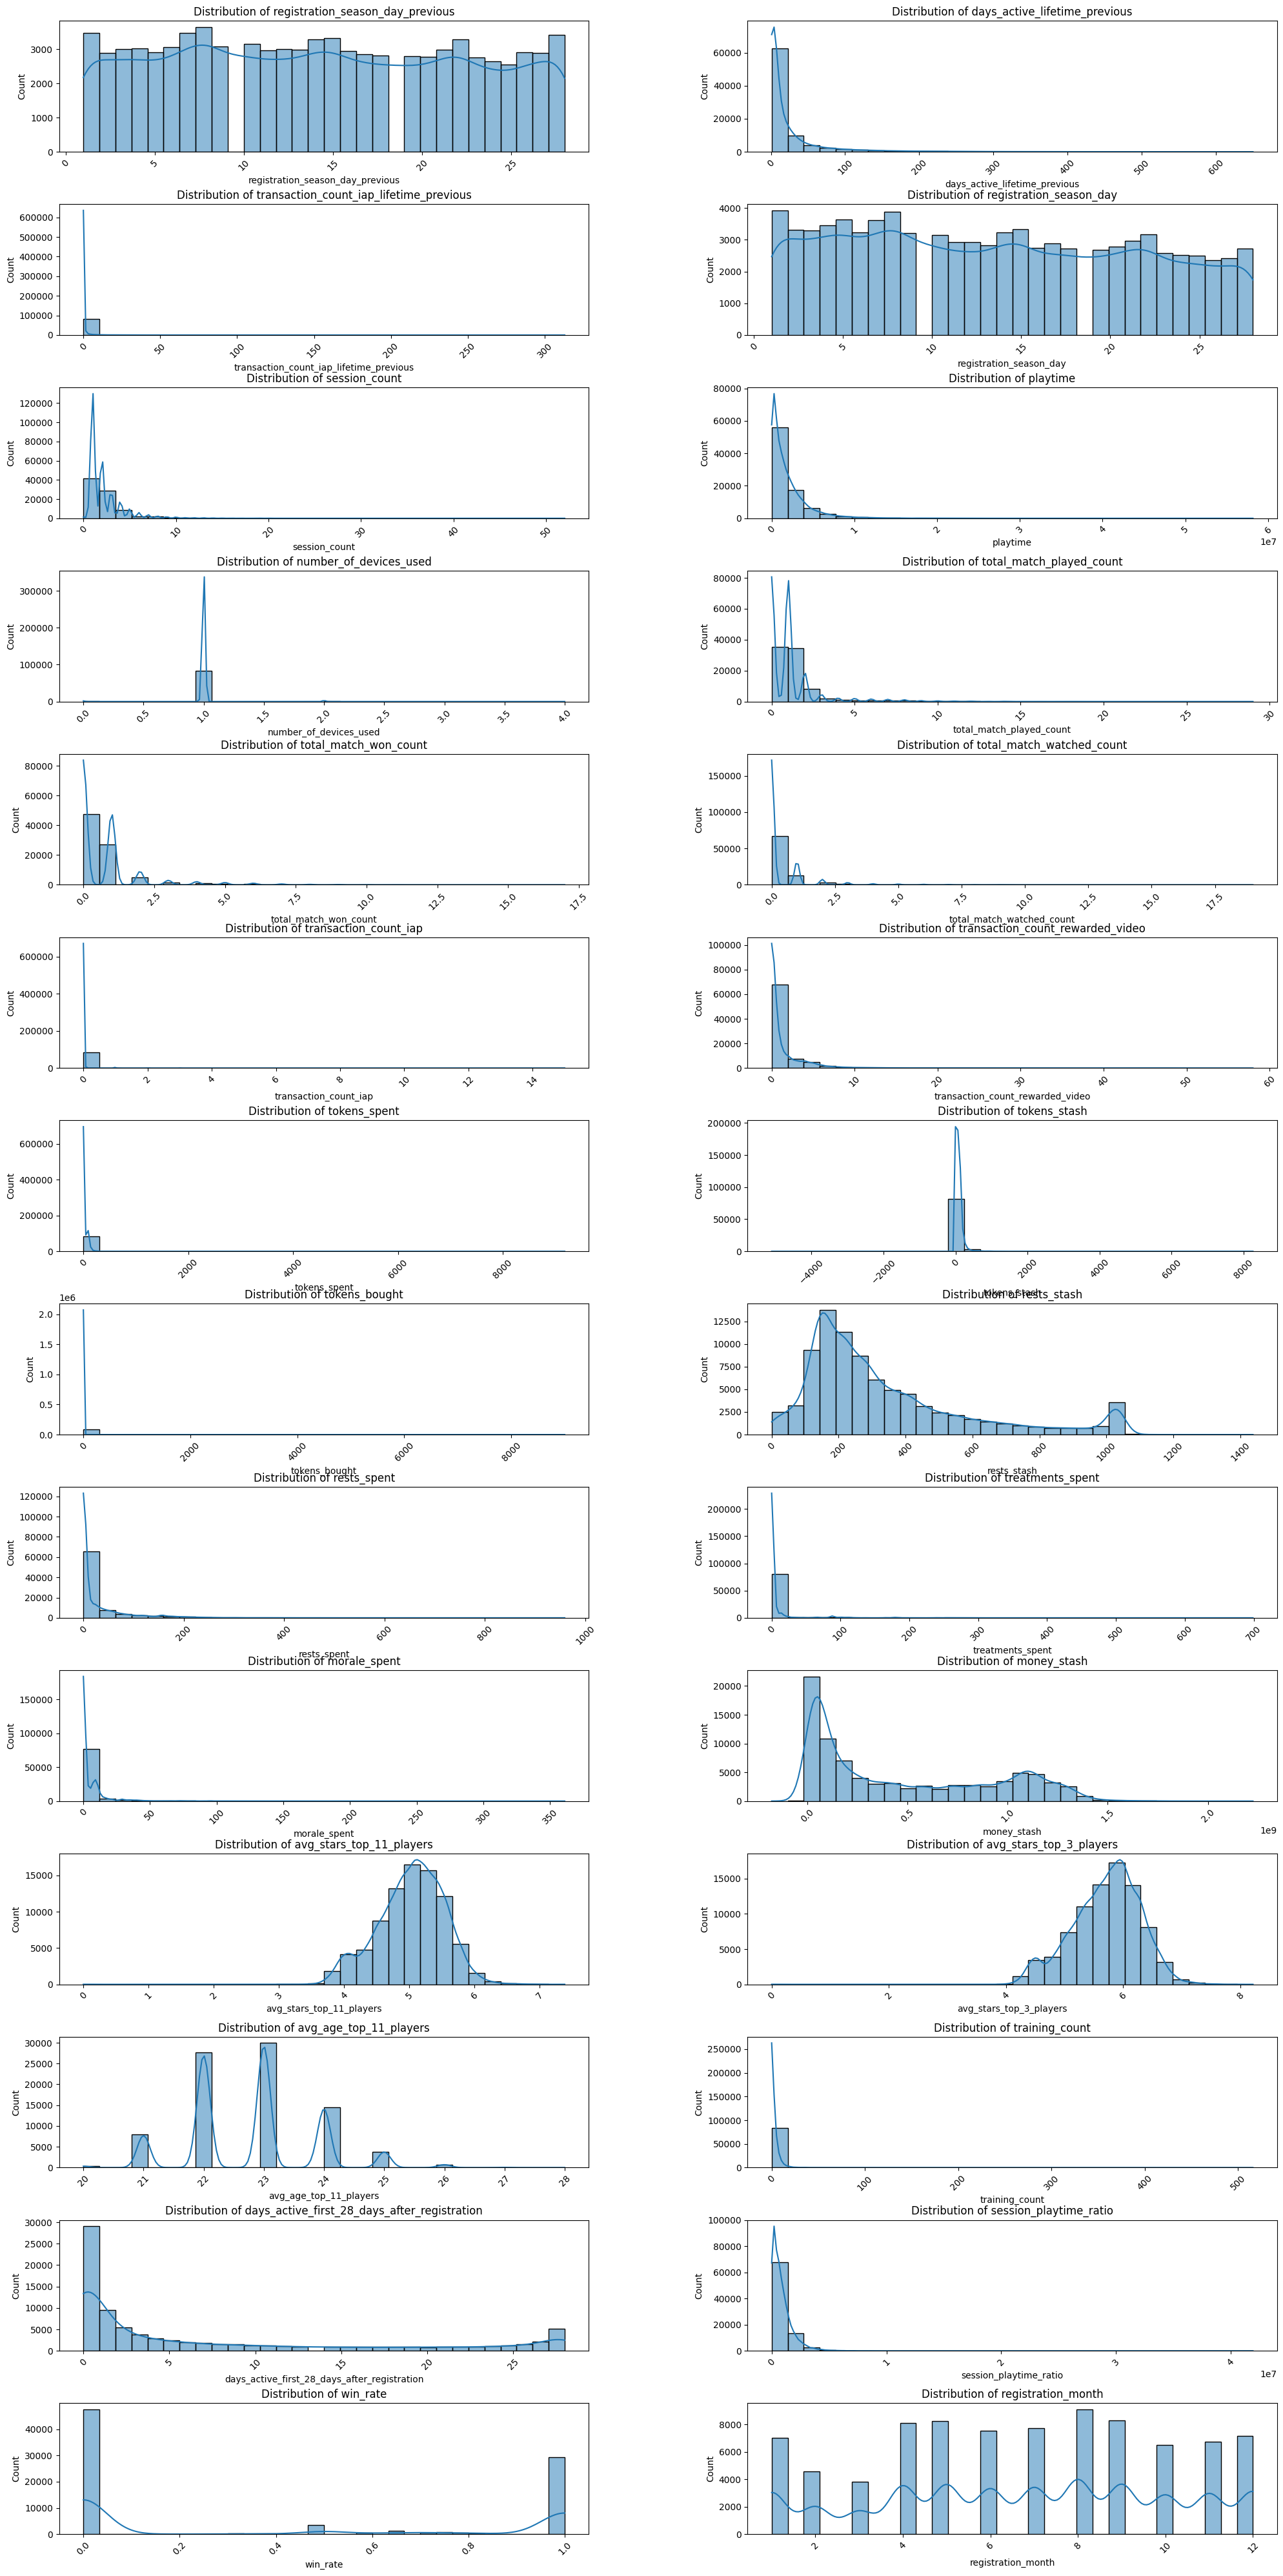

In [41]:
plt.figure(figsize=(20, 40))

numerical_cols.remove('user_id')

num_cols = 2
num_rows = (len(numerical_cols) + 1) // num_cols

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(data=comb_data_train, x=column, bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)  
plt.show()

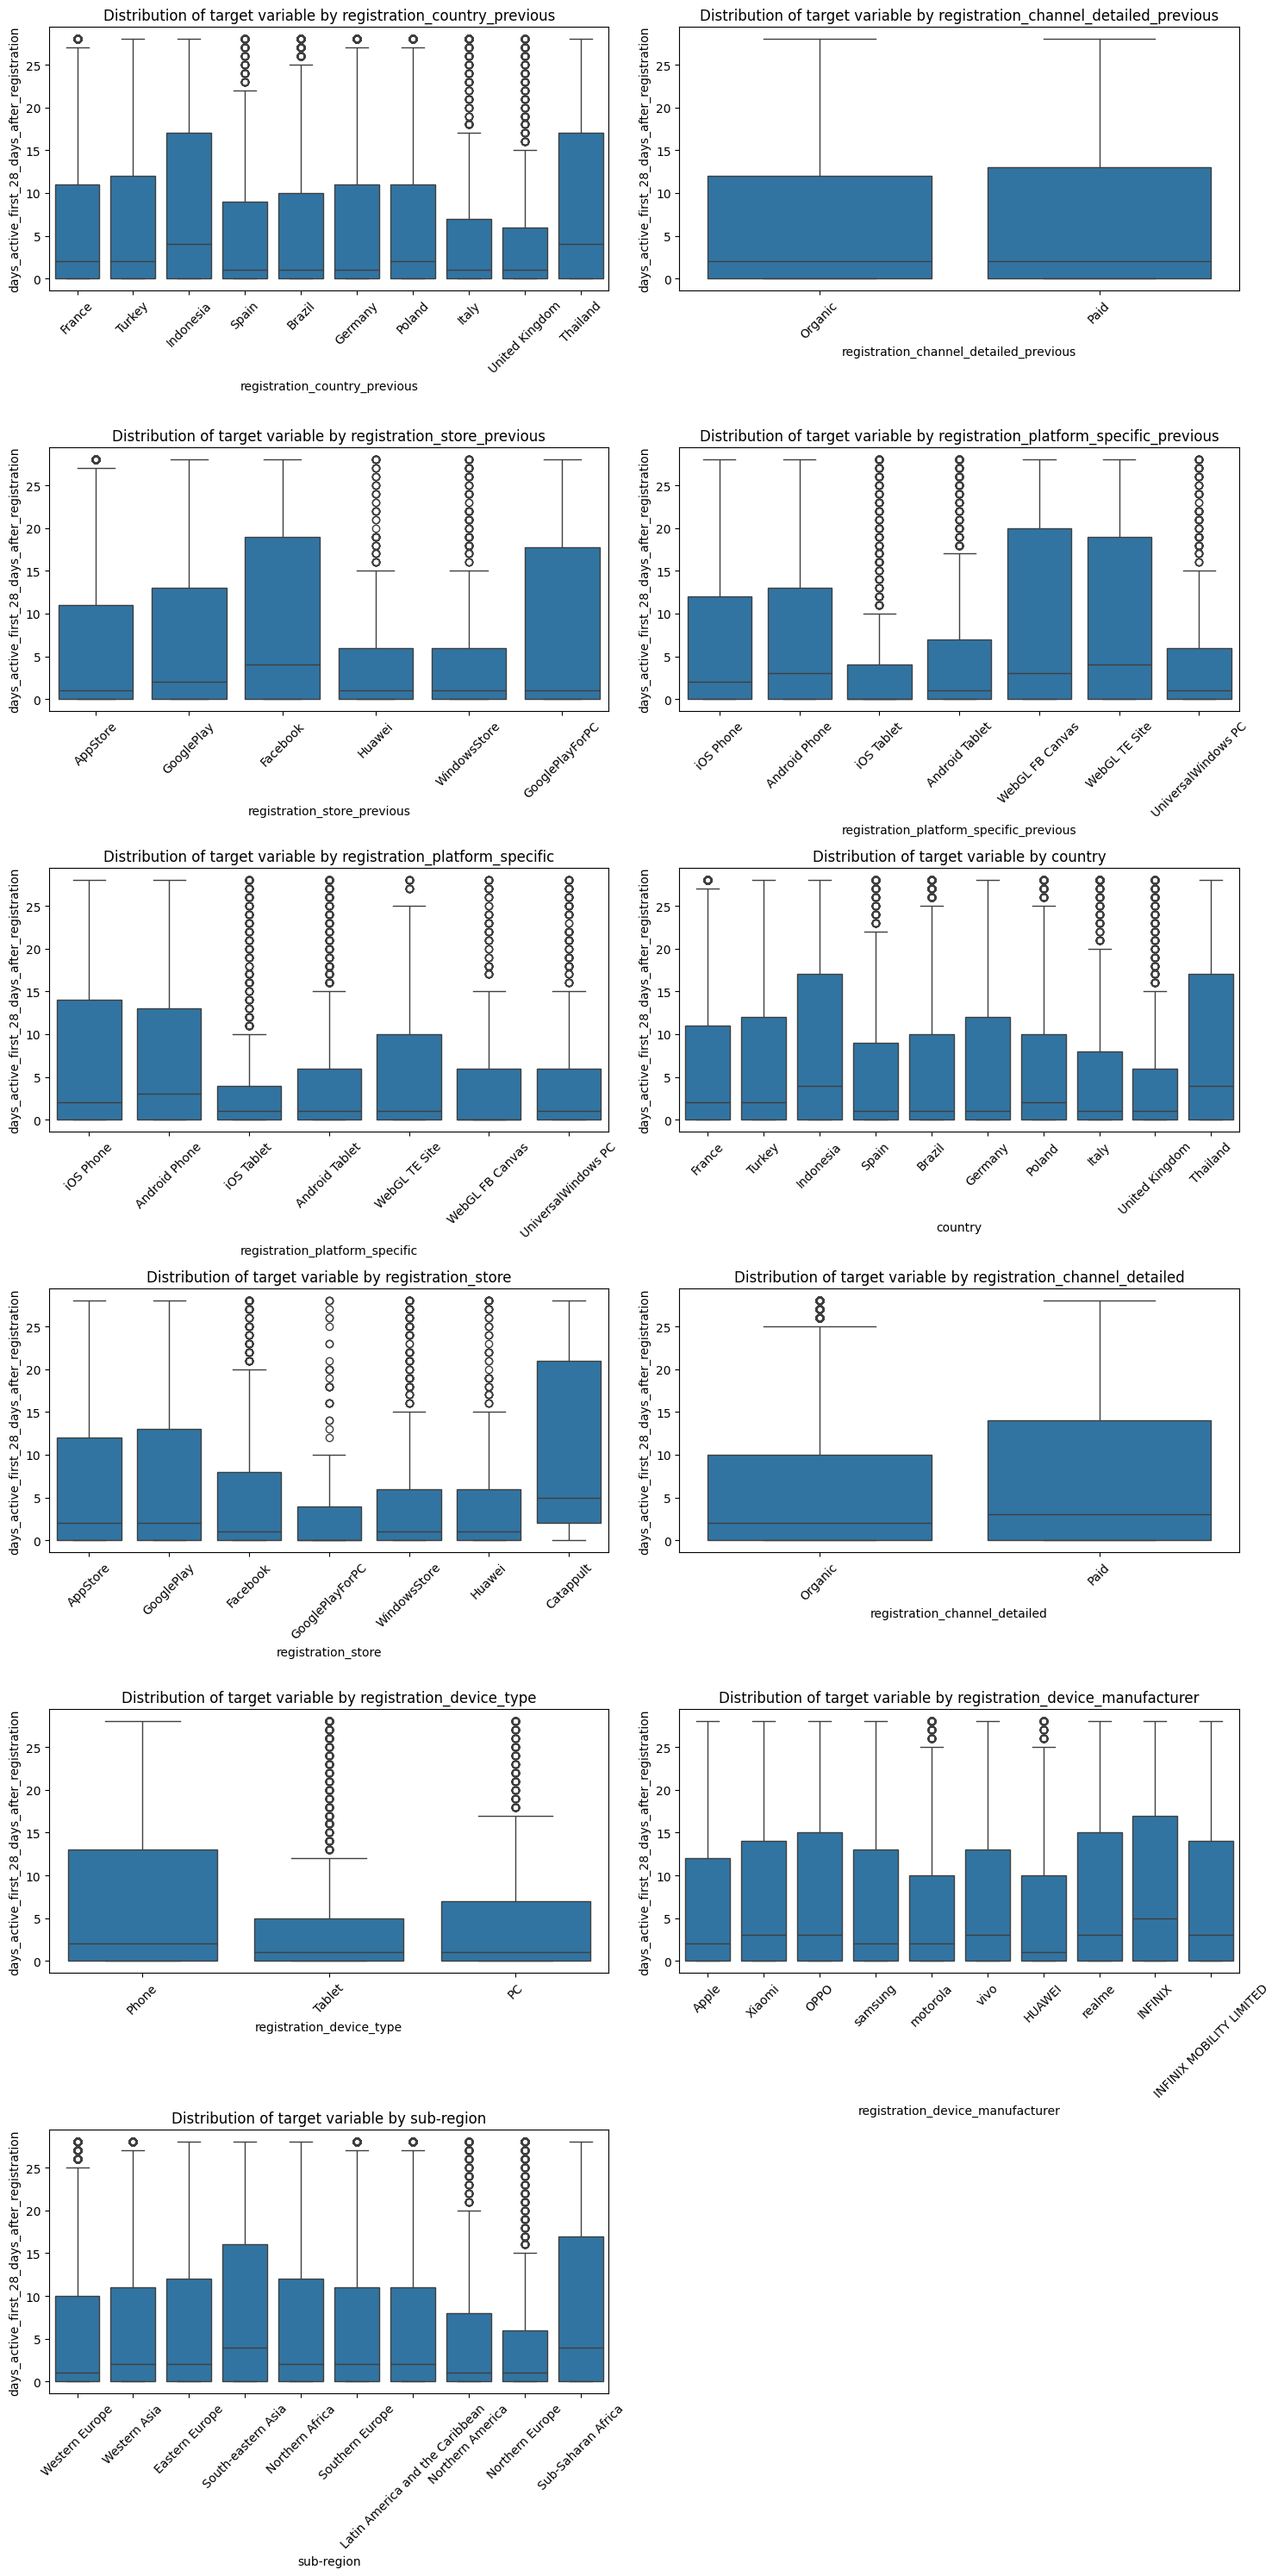

In [42]:
categorical_cols.remove('registration_date_previous')
categorical_cols.remove('registration_time_utc')

plt.figure(figsize=(15, 30))
num_cols = 2
num_rows = (len(categorical_cols) + 1) // num_cols

for i, column in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    
    if comb_data_train[column].nunique() > 10:
        top_categories = comb_data_train[column].value_counts().index[:10]
        data_subset = comb_data_train[comb_data_train[column].isin(top_categories)]
    else:
        data_subset = comb_data_train

    sns.boxplot(data=data_subset, x=column, y='days_active_first_28_days_after_registration')
    plt.title(f'Distribution of target variable by {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

* Indonesia and Thailand (South-Eastern Asia) have most active users
* **registration_channel_detailed** and **registration_channel_detailed_previous** features show that users from paid channels tend to have higher median active days compared to those from organic channels
* Users registered through platforms like Facebook or AppStore appear to have more active days than those from GooglePlay or Huawei
* **registration_device_type** feature shows notable differences, where users on Phone tend to have higher activity compared to those on Tablet or PC
* **registration_platform_specific** and **registration_platform_specific_previous** features reveal that users on iOS Phone and Android Phone tend to be more active compared to other platforms like Android Tablet or Universal/Windows PC

## Analyzing target variable

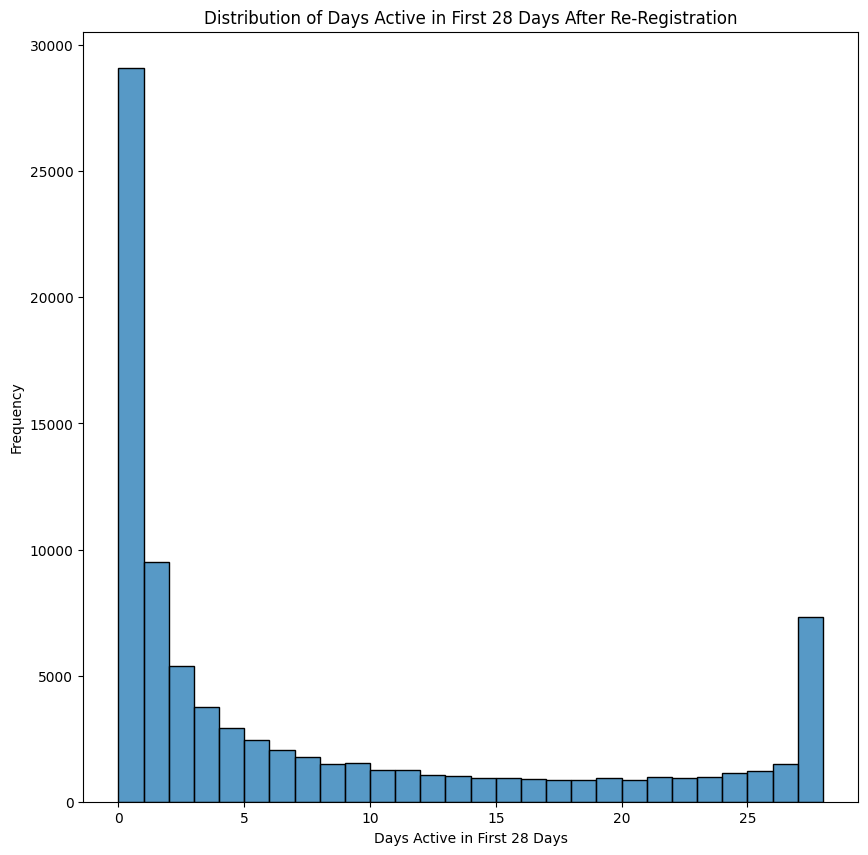

In [43]:
plt.figure(figsize=(10, 10))
sns.histplot(data=comb_data_train, x='days_active_first_28_days_after_registration', bins=28)
plt.title("Distribution of Days Active in First 28 Days After Re-Registration")
plt.xlabel("Days Active in First 28 Days")
plt.ylabel("Frequency")
plt.show()

## Feature selection

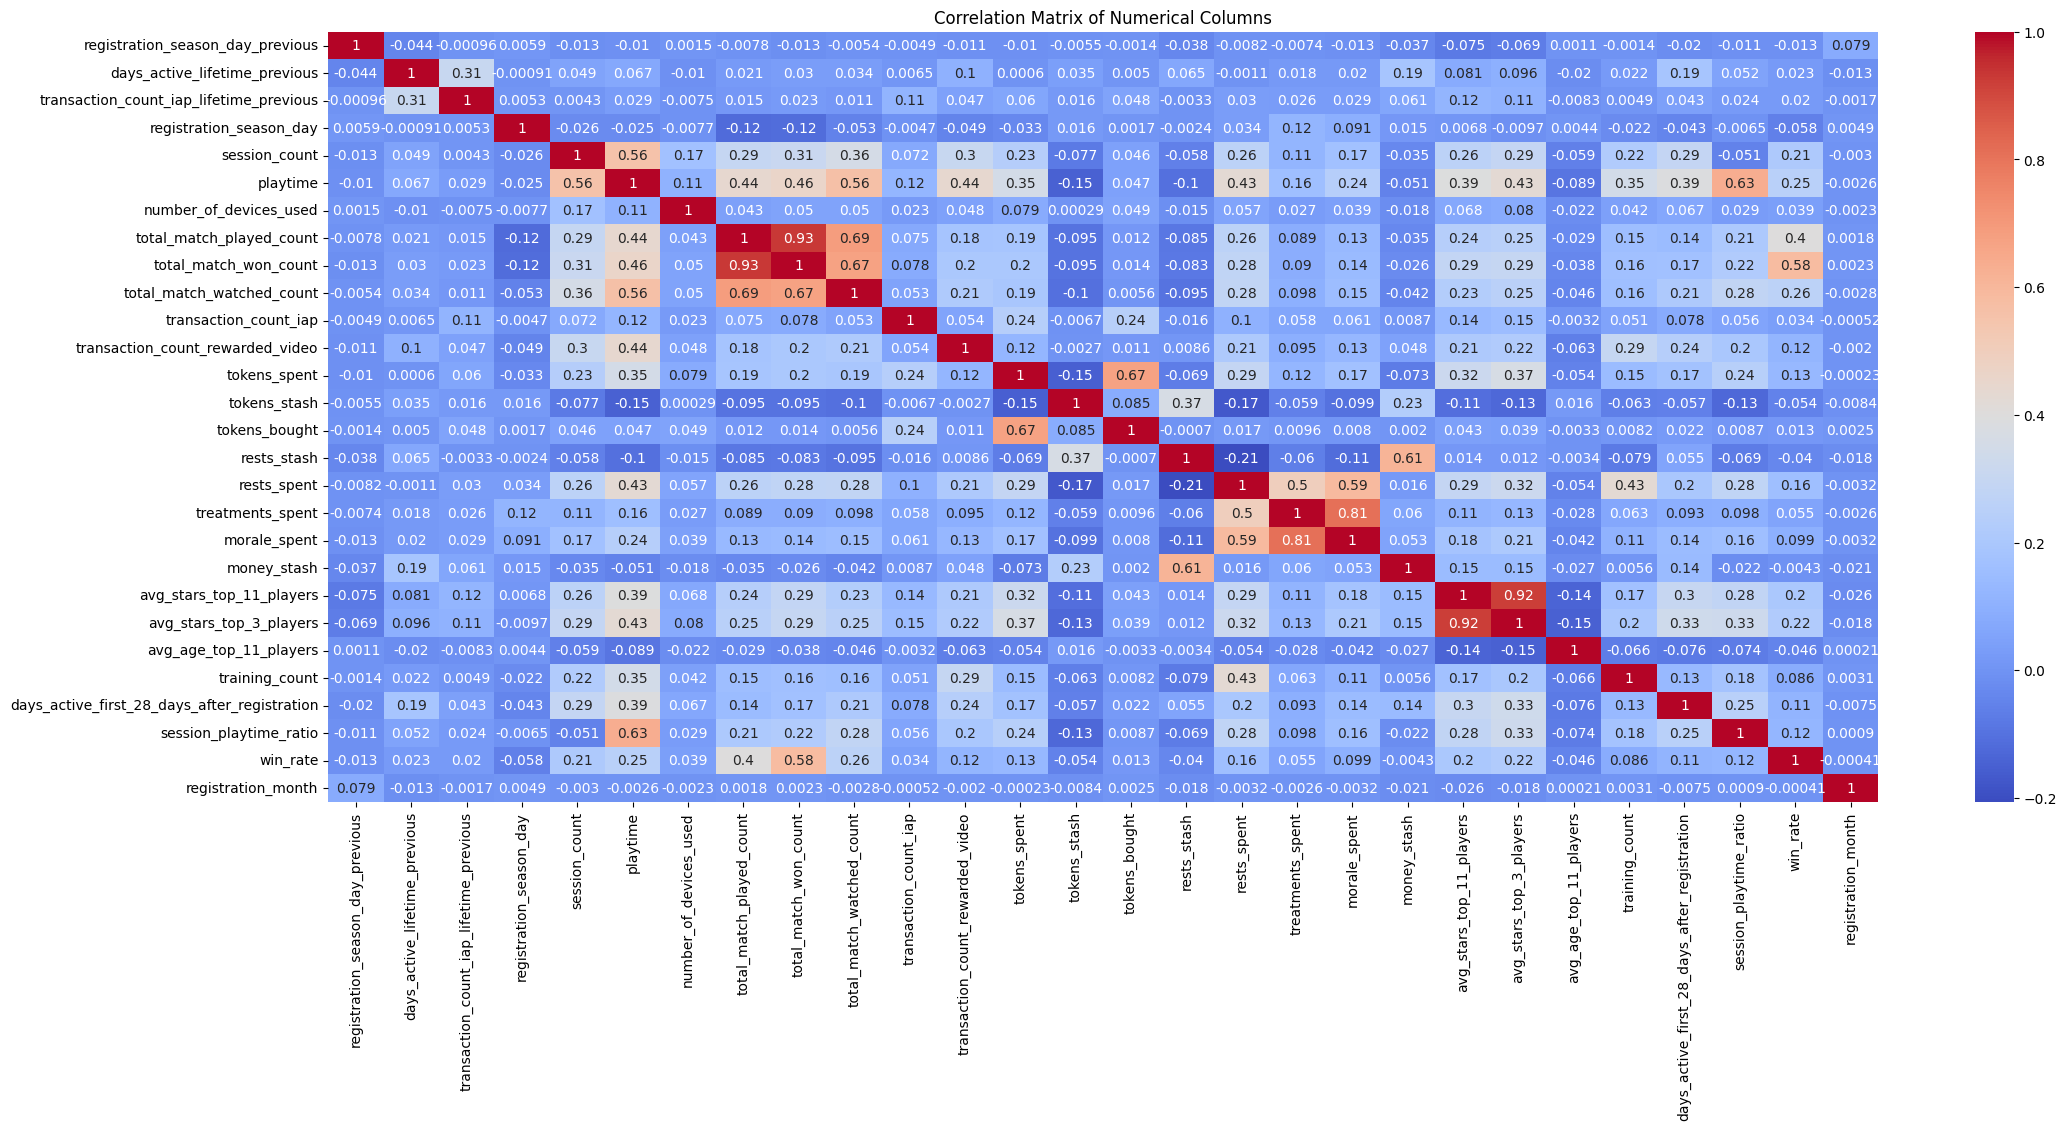

In [44]:
correlation_matrix = comb_data_train[numerical_cols].corr()

# Correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

Highly correlated pairs (corr. coeff. > 0.8):
* tokens_stash and tokens_spent - Users who spend tokens are likely to have accumulated a stash of tokens over time. These features represent similar transactional behavior.
* tokens_bought and tokens_stash are highly correlated - The number of tokens a user has stashed strongly depends on the number of tokens purchased
* total_match_played_count and total_match_won_count are highly correlated - Players who play more matches are likely to win more matches
* avg_stars_top_11_players and avg_stars_top_3_players - Top 3 players are also contained in top 11 players list
* treatments_spent and morale_spent

Moderately Correlated Pairs (corr. coeff. Between 0.5–0.8):
* avg_stars_top_3_players and avg_age_top_11_players - Teams with higher stars among top players may also tend to have slightly older and more experienced players

Highly Correlated Pairs: Dropping one of the features since they convey overlapping information.


In [45]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

print("Highly correlated categorical columns")
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:  # Avoid self-correlation
            correlation = cramers_v(comb_data_train[col1], comb_data_train[col2])
            if correlation > 0.8:
                print(f"Cramér's V between {col1} and {col2}: {correlation}")

Highly correlated categorical columns
Cramér's V between registration_country_previous and country: 0.8950088053471935
Cramér's V between registration_country_previous and sub-region: 0.943458997586511
Cramér's V between registration_platform_specific and registration_device_type: 1.0
Cramér's V between country and registration_country_previous: 0.8950088053471935
Cramér's V between country and sub-region: 1.0
Cramér's V between registration_device_type and registration_platform_specific: 1.0
Cramér's V between sub-region and registration_country_previous: 0.943458997586511
Cramér's V between sub-region and country: 1.0


* Registration_device_type is contained in registration_platform specific (e.g. Tablet in Android Tablet)

Rest is self-explainable.

In [46]:
cols_to_drop = ['user_id', 'total_match_played_count', 'total_match_won_count', 'avg_stars_top_3_players', 'registration_date_previous', 'registration_time_utc', 
                'registration_country_previous', 'registration_device_manufacturer', 'treatments_spent',
                'registration_channel_detailed_previous', 'registration_store_previous', 'registration_platform_specific_previous', 
                'days_active_first_28_days_after_registration', 'registration_device_type', 'playtime', 'session_count']

# Dropping null values
comb_data_train.dropna(axis=0, inplace=True)
comb_data_test.dropna(axis=0, inplace=True)

X_train = comb_data_train.drop(columns=cols_to_drop, axis=1)
y_train = comb_data_train['days_active_first_28_days_after_registration']

cols_to_drop.remove('days_active_first_28_days_after_registration')

X_test = comb_data_test.drop(columns=cols_to_drop, axis=1)

X_train.shape, y_train.shape, X_test.shape

((75039, 28), (75039,), (76664, 28))

Reason for dropping certain columns:
* user_id - it does not provide any meaningful pattern or correlation with the target variable, as it's a purely arbitrary value.
* total_match_played_count and total_match_won_count - reduced into ratio (win_rate)
* registration_time_utc - too granular to detect meaningful patterns
* registration_country_previous and registration_date_previous - historical registration dates for users who might have re-registered could be irrelevant to their future behavior
* avg_stars_top_3_players - high correlation with "avg_stars_top_11_players", might cause multicolinearity problem


In [47]:
X_train['is_payer_lifetime_previous'] = X_train['is_payer_lifetime_previous'].apply(lambda x: 1 if x == True else 0)
X_test['is_payer_lifetime_previous'] = X_test['is_payer_lifetime_previous'].apply(lambda x: 1 if x == True else 0)

X_train['is_rewarded_video_watcher_lifetime_previous'] = X_train['is_rewarded_video_watcher_lifetime_previous'].apply(lambda x: 1 if x == True else 0)
X_test['is_rewarded_video_watcher_lifetime_previous'] = X_test['is_rewarded_video_watcher_lifetime_previous'].apply(lambda x: 1 if x == True else 0)

In [48]:
X_train_dummy = pd.get_dummies(data=X_train.drop(columns=['country'], axis=1), drop_first=True, dtype='int')
X_test_dummy = pd.get_dummies(data=X_test.drop(columns=['country'], axis=1), drop_first=True, dtype='int')

X_train_dummy.shape, X_test_dummy.shape

((75039, 46), (76664, 46))

## Two-Stage Modeling

Target variable has a large number of zeroes and a few non-zero, high-value outliers, training a single regression model can lead to poor performance. A two-stage approach separates these two groups:
* Stage 1 (Classification): Focuses on separating zeroes from non-zero values.
* Stage 2 (Regression): Focuses on the distribution of non-zero values, which is often less skewed and easier to model.

In [49]:
# Splitting train data into two parts, so I can check for overfitting
X_train, X_eval, y_train, y_eval = train_test_split(X_train_dummy, y_train, test_size=0.2, random_state=42)

X_train = X_train.reset_index(drop=True)
X_eval = X_eval.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_eval = y_eval.reset_index(drop=True)

# Step 1: Binary Classification for Active Users
y_classification = (y_train > 0).astype(int)  # 1 if active, 0 if not

Number of active users (more than 0 days of activity): 39677
Number of non-active users: 20354


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18560\3647566942.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Activity', y='Count', data=counts, palette='viridis', ax=axes[0])


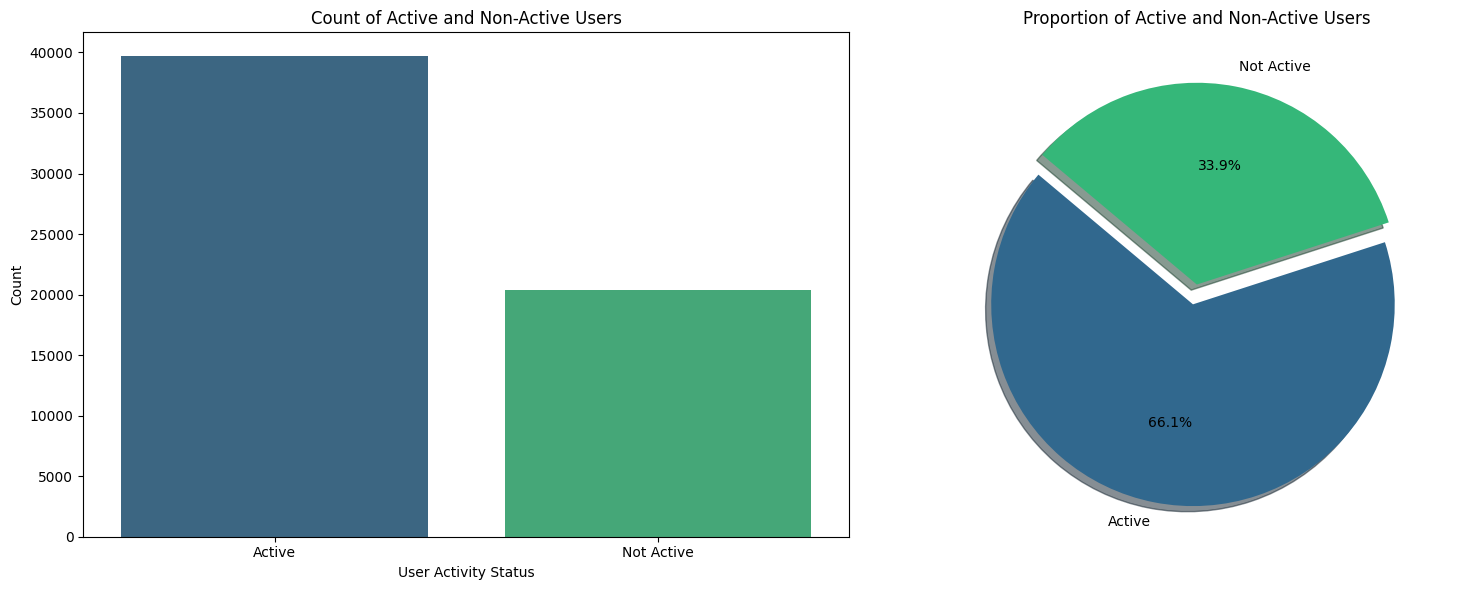

In [50]:
active_count = (y_classification == 1).sum()
non_active_count = (y_classification == 0).sum()

counts = pd.DataFrame({
    'Activity': ['Active', 'Not Active'],
    'Count': [active_count, non_active_count]
})

print('Number of active users (more than 0 days of activity):', active_count)
print('Number of non-active users:', non_active_count)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
sns.barplot(x='Activity', y='Count', data=counts, palette='viridis', ax=axes[0])
axes[0].set_title('Count of Active and Non-Active Users')
axes[0].set_xlabel('User Activity Status')
axes[0].set_ylabel('Count')

# Pie chart
labels = counts['Activity']
sizes = counts['Count']
colors = sns.color_palette('viridis', len(labels))
explode = (0.1, 0) 

axes[1].pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
axes[1].set_title('Proportion of Active and Non-Active Users')

plt.tight_layout()
plt.show()

* 2:1 imbalance in Active and Not Active number of users (not a problem)

Classification Metrics (Training):
Accuracy: 0.7895
Precision: 0.8175
Recall: 0.8773
F1 Score: 0.8464
ROC AUC: 0.8671

Classification Metrics (Evaluation):
Accuracy: 0.7719
Precision: 0.8024
Recall: 0.8646
F1 Score: 0.8323
ROC AUC: 0.8320

Mean Absolute Error (MAE): 6.1588

Cross-validated Classification Accuracy: 0.7753 ± 0.0031


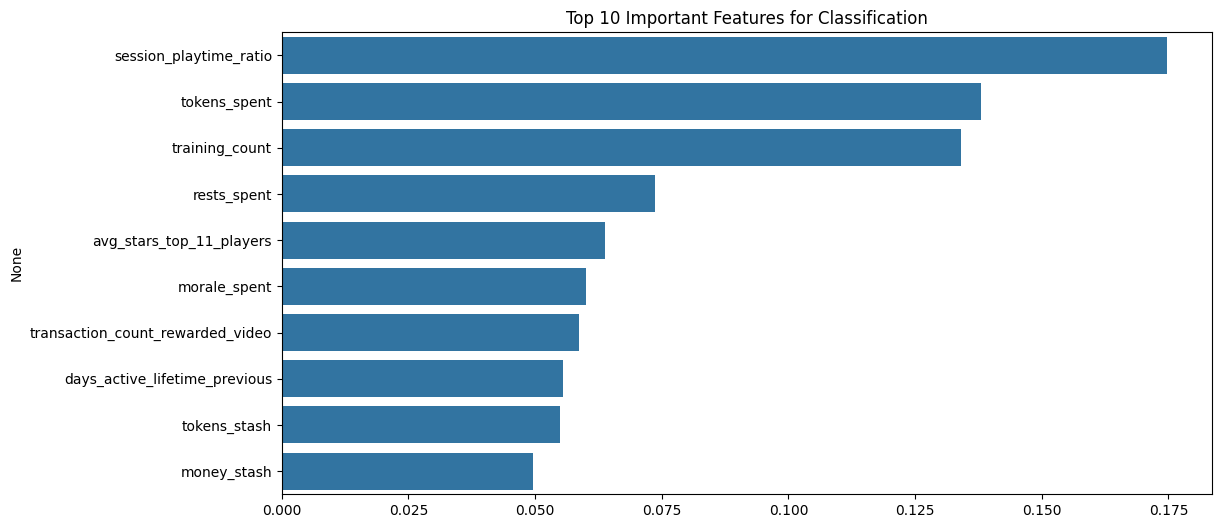

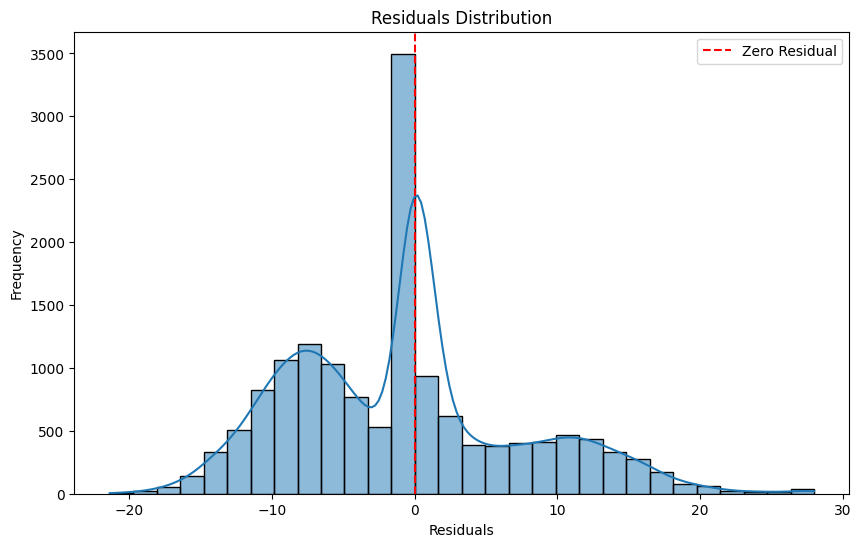


Classification Train Accuracy: 0.7895
Classification Eval Accuracy: 0.7719

Regression Train MAE: 6.6867
Regression Eval MAE: 6.1588


In [51]:
# Step 1: Classification of Users to Active and Not Active classes 
classifier = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
classifier.fit(X_train, y_classification)

y_pred_classification_train = classifier.predict(X_train)
y_pred_classification_eval = classifier.predict(X_eval)

classification_metrics = {
    "Accuracy": accuracy_score(y_classification, y_pred_classification_train),
    "Precision": precision_score(y_classification, y_pred_classification_train),
    "Recall": recall_score(y_classification, y_pred_classification_train),
    "F1 Score": f1_score(y_classification, y_pred_classification_train),
    "ROC AUC": roc_auc_score(y_classification, classifier.predict_proba(X_train)[:, 1]),
}

print("Classification Metrics (Training):")
for metric, value in classification_metrics.items():
    print(f"{metric}: {value:.4f}")

classification_metrics_eval = {
    "Accuracy": accuracy_score(
        (y_eval > 0).astype(int), y_pred_classification_eval
    ),
    "Precision": precision_score(
        (y_eval > 0).astype(int), y_pred_classification_eval
    ),
    "Recall": recall_score((y_eval > 0).astype(int), y_pred_classification_eval),
    "F1 Score": f1_score((y_eval > 0).astype(int), y_pred_classification_eval),
    "ROC AUC": roc_auc_score(
        (y_eval > 0).astype(int), classifier.predict_proba(X_eval)[:, 1]
    ),
}

print("\nClassification Metrics (Evaluation):")
for metric, value in classification_metrics_eval.items():
    print(f"{metric}: {value:.4f}")

# Step 2: Regression for Active Users
X_train_regression = X_train[y_train > 0]
y_train_regression = y_train[y_train > 0]

regression_model = XGBRegressor(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
regression_model.fit(X_train_regression, y_train_regression)

# Applying regression only to rows in X_eval where the classifier predicted active (1)
X_eval_active = X_eval[y_pred_classification_eval == 1].reset_index(drop=True)
y_pred_regression_eval = regression_model.predict(X_eval_active)

y_pred_final = np.zeros(len(X_eval))
y_pred_final[y_pred_classification_eval == 1] = y_pred_regression_eval

mae = mean_absolute_error(y_eval, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_eval, y_pred_final))
print(f"\nMean Absolute Error (MAE): {mae:.4f}")

# Cross-validation 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(classifier, X_train, y_classification, cv=skf, scoring="accuracy")
print(f"\nCross-validated Classification Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

feature_importances = classifier.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
top_features = X_train.columns[sorted_idx][:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances[sorted_idx][:10], y=top_features)
plt.title("Top 10 Important Features for Classification")
plt.show()

# Residuals for Regression
residuals = y_eval - y_pred_final

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color="red", linestyle="--", label="Zero Residual")
plt.legend()
plt.show()

# Check for Overfitting
classification_train_accuracy = accuracy_score(y_classification, y_pred_classification_train)
classification_eval_accuracy = accuracy_score((y_eval > 0).astype(int), y_pred_classification_eval)
print(f"\nClassification Train Accuracy: {classification_train_accuracy:.4f}")
print(f"Classification Eval Accuracy: {classification_eval_accuracy:.4f}")

regression_train_mae = mean_absolute_error(y_train_regression, regression_model.predict(X_train_regression))
print(f"\nRegression Train MAE: {regression_train_mae:.4f}")
print(f"Regression Eval MAE: {mae:.4f}")

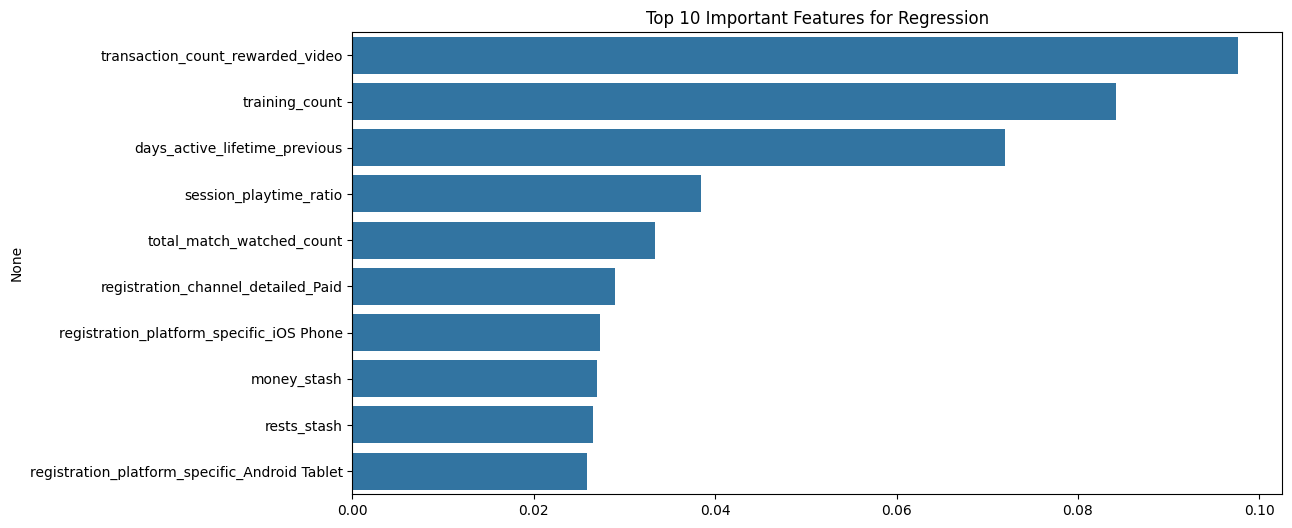

In [52]:
feature_importances = regression_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
top_features = X_train_regression.columns[sorted_idx][:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances[sorted_idx][:10], y=top_features)
plt.title("Top 10 Important Features for Regression")
plt.show()

## Getting Final Results

The values_to_classes function maps continuous numerical predictions into discrete classes (integers) based on the observed distribution of a target variable (y_train) in the training dataset. This is useful for converting regression outputs into categories, in this case as predicting days of activity into classes ranging from 0 to 28.

In [53]:
N_CLASSES = 29

def values_to_classes(ys: np.ndarray, y_freq: pd.Series, verbose=False) -> np.ndarray:
    y_freq = y_freq / y_freq.sum()
    cum_freqs = [y_freq.loc[list(range(i))].sum() for i in range(N_CLASSES)]
    thresholds = []

    for y in sorted(set(ys)):
        fraction = (ys < y).mean()
        if fraction > cum_freqs[len(thresholds) + 1]:
            thresholds.append(y)
            if len(thresholds) == N_CLASSES - 1:
                break
    ys_out = np.array([N_CLASSES - 1] * len(ys), dtype=int)
    for i in reversed(range(N_CLASSES - 1)):
        ys_out[ys < thresholds[i]] = i
    if verbose:
        print('thresholds: ' +  ' '.join(f'{th:.3f}' for th in thresholds))
    return ys_out

A user may have multiple previous lives, resulting in different predictions for the same user. To address this, I calculated the mean value of these predictions to provide a single, aggregated prediction for each user.

In [54]:
# Step 1: Classification of Users to Active and Not Active on Test Data
y_pred_classification_test = classifier.predict(X_test_dummy)

# Step 2: Regression for Predicted Active Users in Test Data
X_test_active = X_test_dummy[y_pred_classification_test == 1].reset_index(drop=True)  
y_pred_regression_test = regression_model.predict(X_test_active)

y_pred_test_final = np.zeros(len(X_test_dummy))  
y_pred_test_final[y_pred_classification_test == 1] = y_pred_regression_test 

test_predictions = pd.DataFrame({
    'user_id': comb_data_test['user_id'],  
    'predicted_days_active_first_28_days_after_registration': y_pred_test_final
})

# Group by user_id and aggregate predictions
# Using mean aggregation for users with multiple entries
aggregated_predictions = test_predictions.groupby('user_id', as_index=False).agg({
    'predicted_days_active_first_28_days_after_registration': 'mean'
})

aggregated_predictions['predicted_days_active_first_28_days_after_registration'] = values_to_classes(
    aggregated_predictions['predicted_days_active_first_28_days_after_registration'].values, 
    y_train.value_counts()
)

aggregated_predictions.to_csv('days_active_first_28_days_after_registration_predictions.csv', index=False)
print("Predictions saved to 'days_active_first_28_days_after_registration_predictions.csv'.")

Predictions saved to 'days_active_first_28_days_after_registration_predictions.csv'.


## Future improvements

* **Hyperparameter Tuning** 
* **Addressing the "Multiple Previous Lives" Issue** - Explore more advanced aggregation methods for users with multiple previous lives (Weighted Aggregation, Clustering Previous Lives, Sequence Modeling)
* **Feature Engineering** - Extract features such as the time between previous lives and registration, trends in playtime, or activity spikes, Identify game-specific metrics...
